In [73]:
# Basic DS libraries
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from wordcloud import WordCloud
from collections import Counter

# Exploratory Data Analysis


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/new_train.csv", index_col=0)

## i) Basic Dataset Exploration

In [76]:
data.head()

,medical_specialty,transcription,labels
0,Emergency Room Reports,"REASON FOR THE VISIT:, Very high PT/INR.,HIST...",0
1,Surgery,"PREOPERATIVE DIAGNOSIS:, Acetabular fracture ...",1
2,Surgery,"NAME OF PROCEDURE,1. Selective coronary angio...",1
3,Radiology,"REFERRING DIAGNOSIS: , Motor neuron disease.,P...",2
4,Emergency Room Reports,"CHIEF COMPLAINT: , Dental pain.,HISTORY OF PRE...",0


In [77]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columsns.\n")
print("Missing values per column:")
print(data.isnull().sum())

The dataset has 3969 rows and 3 columsns.

Missing values per column:
medical_specialty    0
transcription        0
labels               0
dtype: int64


Sample Transcription:

In [78]:
pprint(data.transcription[0])

('REASON FOR THE VISIT:,  Very high PT/INR.,HISTORY: , The patient is an '
 '81-year-old lady whom I met last month when she came in with pneumonia and '
 'CHF.  She was noticed to be in atrial fibrillation, which is a chronic '
 'problem for her.  She did not want to have Coumadin started because she said '
 'that she has had it before and the INR has had been very difficult to '
 'regulate to the point that it was dangerous, but I convinced her to restart '
 'the Coumadin again.  I gave her the Coumadin as an outpatient and then the '
 'INR was found to be 12.  So, I told her to come to the emergency room to get '
 'vitamin K to reverse the anticoagulation.,PAST MEDICAL HISTORY:,1.  '
 'Congestive heart failure.,2.  Renal insufficiency.,3.  Coronary artery '
 'disease.,4.  Atrial fibrillation.,5.  COPD.,6.  Recent pneumonia.,7.  '
 'Bladder cancer.,8.  History of ruptured colon.,9.  Myocardial '
 'infarction.,10.  Hernia repair.,11.  Colon resection.,12.  Carpal tunnel '
 'repair.,13

## ii) Label Analysis

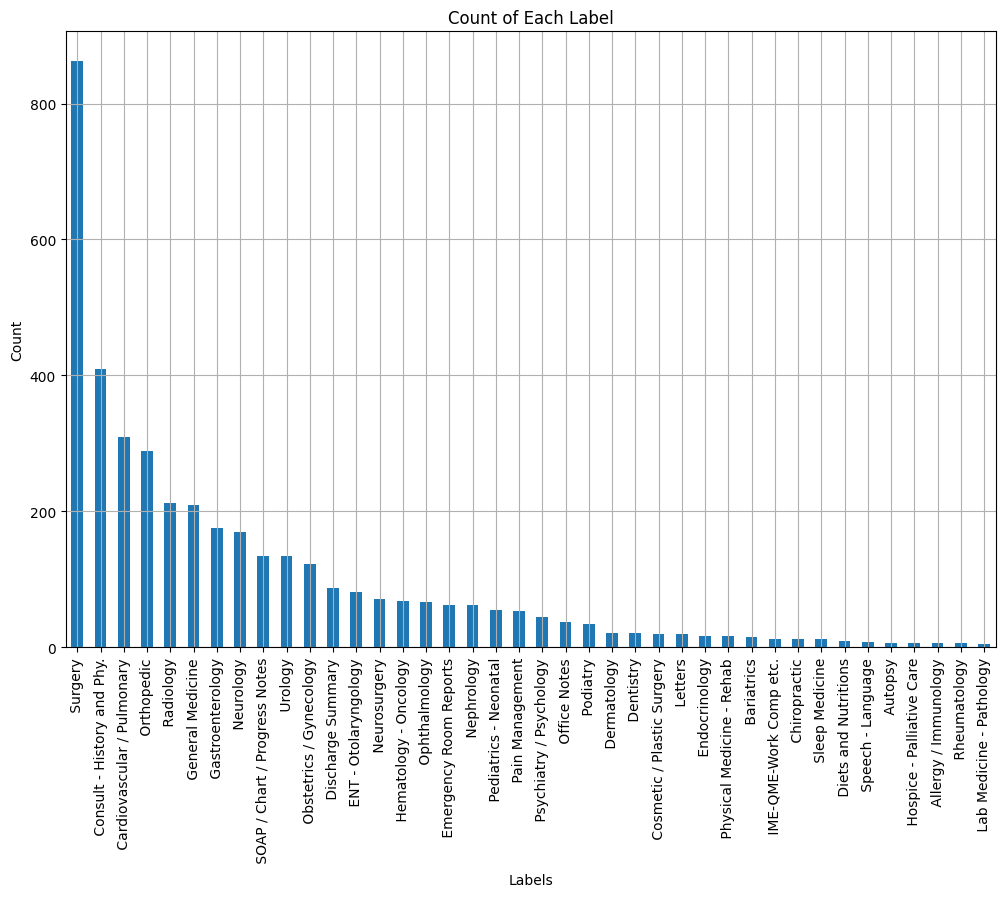

In [79]:
label_counts = data["medical_specialty"].value_counts()
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.grid(True)
plt.show()

## iii) Transcription Analysis

### Text Length Summary Statistics

In [80]:
transcription_lens = data["transcription"].str.len()
pd.DataFrame(transcription_lens.describe())

,transcription
count,3969.000000
mean,3067.837994
std,2031.182363
min,11.000000
25%,1608.000000
50%,2667.000000
75%,4017.000000
max,18425.000000


### Text Length Distribution

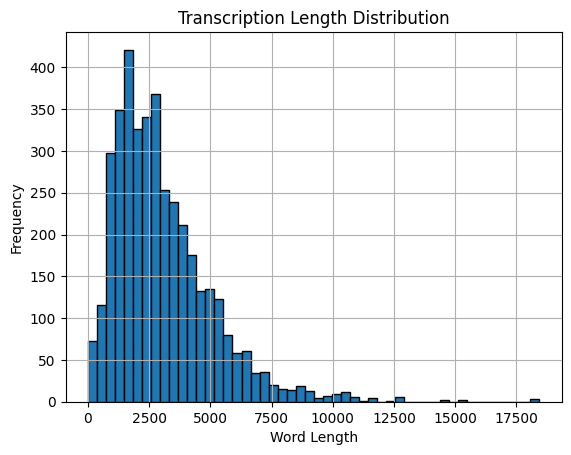

In [81]:
plt.hist(transcription_lens, bins=50, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Transcription Length Distribution')
plt.grid(True)
plt.show()

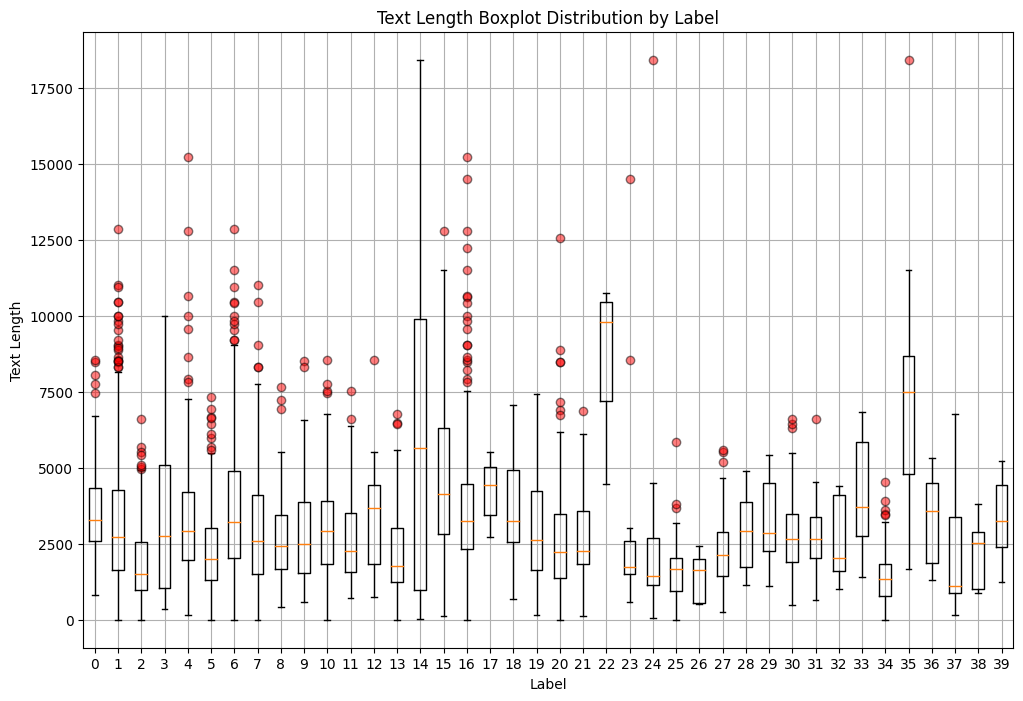

{0: ' Emergency Room Reports',
 1: ' Surgery',
 2: ' Radiology',
 3: ' Podiatry',
 4: ' Neurology',
 5: ' Gastroenterology',
 6: ' Orthopedic',
 7: ' Cardiovascular / Pulmonary',
 8: ' Nephrology',
 9: ' ENT - Otolaryngology',
 10: ' General Medicine',
 11: ' Hematology - Oncology',
 12: ' Cosmetic / Plastic Surgery',
 13: ' SOAP / Chart / Progress Notes',
 14: ' Chiropractic',
 15: ' Psychiatry / Psychology',
 16: ' Consult - History and Phy.',
 17: ' Hospice - Palliative Care',
 18: ' Neurosurgery',
 19: ' Obstetrics / Gynecology',
 20: ' Urology',
 21: ' Discharge Summary',
 22: ' Autopsy',
 23: ' Dermatology',
 24: ' Letters',
 25: ' Office Notes',
 26: ' Lab Medicine - Pathology',
 27: ' Ophthalmology',
 28: ' Speech - Language',
 29: ' Dentistry',
 30: ' Pediatrics - Neonatal',
 31: ' Physical Medicine - Rehab',
 32: ' Bariatrics',
 33: ' Endocrinology',
 34: ' Pain Management',
 35: ' IME-QME-Work Comp etc.',
 36: ' Allergy / Immunology',
 37: ' Sleep Medicine',
 38: ' Diets and

In [82]:
# Create a labels:medical specialty dict
labels_dict = dict(zip(data['labels'], data['medical_specialty']))
labels = list(labels_dict.keys())

# Get length of transciption per label
transcr_len_per_label = []
for label in labels:
    text_lengths = data[data['labels'] == label]['transcription'].str.len()
    transcr_len_per_label.append(text_lengths)

# Create boxplot for each label
plt.figure(figsize=(12, 8))
plt.boxplot(transcr_len_per_label, labels=labels, flierprops={'markerfacecolor': 'red', 'marker': 'o', 'alpha' : 0.5})
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.title('Text Length Boxplot Distribution by Label')
plt.grid(True)
plt.show()

# Print the Labels and Specialty dictionary
labels_dict

### Text Cleaning

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [84]:
corpus = []
text_data = ""
for index, row in data.iterrows():
  text_data = re.sub('[^a-zA-Z]', ' ', row['transcription'])
  text_data = text_data.lower()
  text_data = text_data.split()
  wl = WordNetLemmatizer()
  text_data = [wl.lemmatize(word) for word in text_data if not word in set(stopwords.words('english'))]
  text_data = ' '.join(text_data)
  corpus.append(text_data)
data["transcription_cleaned_simple"] = corpus

Pre-Clean vs Post-Clean Diff

In [85]:
print("Raw Transcription Sample:")
pprint(data["transcription"][0])
print()
print("Cleaned Transcription Sample:")
pprint(data["transcription_cleaned_simple"][0])

Raw Transcription Sample:
('REASON FOR THE VISIT:,  Very high PT/INR.,HISTORY: , The patient is an '
 '81-year-old lady whom I met last month when she came in with pneumonia and '
 'CHF.  She was noticed to be in atrial fibrillation, which is a chronic '
 'problem for her.  She did not want to have Coumadin started because she said '
 'that she has had it before and the INR has had been very difficult to '
 'regulate to the point that it was dangerous, but I convinced her to restart '
 'the Coumadin again.  I gave her the Coumadin as an outpatient and then the '
 'INR was found to be 12.  So, I told her to come to the emergency room to get '
 'vitamin K to reverse the anticoagulation.,PAST MEDICAL HISTORY:,1.  '
 'Congestive heart failure.,2.  Renal insufficiency.,3.  Coronary artery '
 'disease.,4.  Atrial fibrillation.,5.  COPD.,6.  Recent pneumonia.,7.  '
 'Bladder cancer.,8.  History of ruptured colon.,9.  Myocardial '
 'infarction.,10.  Hernia repair.,11.  Colon resection.,12.  Ca

A Word Cloud of the words in transcriptions:

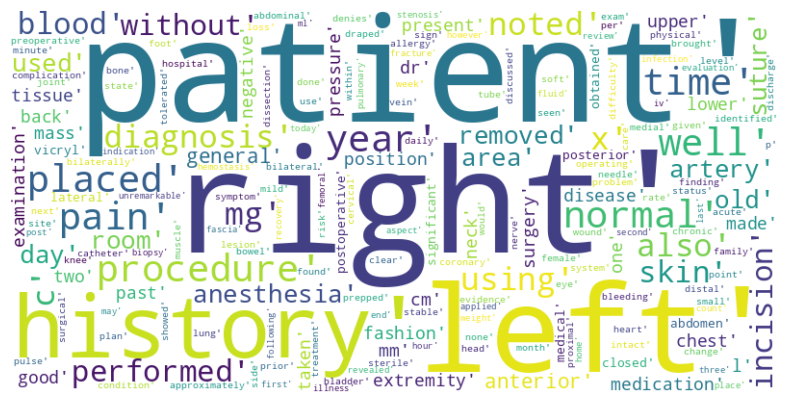

In [86]:
transcription_cleaned_all = ' '.join(data['transcription_cleaned_simple'])
top_words= ''
words = transcription_cleaned_all.split()
word_counts = Counter(words)
top_words = word_counts.most_common(200)
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate(str(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Top Words per label:

In [87]:
top_words_per_label = {}
grouped = data.groupby('medical_specialty')

# Iterate over each group
for label, group in grouped:
    words = ' '.join(group['transcription_cleaned_simple']).split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(3)
    top_words_per_label[label] = top_words

# Print the top 3 words for each label
for label, top_words in top_words_per_label.items():
    print(f"Label: {label}")
    for word, count in top_words:
        print(f"Word: {word}, Count: {count}")
    print()

Label:  Allergy / Immunology
Word: history, Count: 26
Word: patient, Count: 23
Word: noted, Count: 23

Label:  Autopsy
Word: right, Count: 108
Word: inch, Count: 91
Word: left, Count: 83

Label:  Bariatrics
Word: patient, Count: 57
Word: history, Count: 48
Word: also, Count: 35

Label:  Cardiovascular / Pulmonary
Word: patient, Count: 1445
Word: left, Count: 1383
Word: right, Count: 1141

Label:  Chiropractic
Word: pain, Count: 169
Word: patient, Count: 90
Word: back, Count: 89

Label:  Consult - History and Phy.
Word: patient, Count: 2637
Word: history, Count: 2240
Word: normal, Count: 1070

Label:  Cosmetic / Plastic Surgery
Word: patient, Count: 86
Word: breast, Count: 81
Word: procedure, Count: 77

Label:  Dentistry
Word: patient, Count: 176
Word: tooth, Count: 87
Word: left, Count: 80

Label:  Dermatology
Word: patient, Count: 86
Word: skin, Count: 78
Word: area, Count: 54

Label:  Diets and Nutritions
Word: patient, Count: 43
Word: weight, Count: 37
Word: carbohydrate, Count: 34


Save the pre-processes dataset

In [68]:
data.to_csv("cleaned_data.csv")